In [33]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from networkx.algorithms import bipartite
import pandas as pd
from scipy.stats import linregress
from scipy.optimize import curve_fit
from sklearn import preprocessing

In [2]:
DATA = '../Data/out.moreno_crime_crime'
ROLE = '../Data/rel.moreno_crime_crime.person.role'
NAME = '../Data/ent.moreno_crime_crime.person.name'
SEX =  '../Data/ent.moreno_crime_crime.person.sex'

In [3]:
with open(DATA) as f:
    data = f.read().splitlines()
    
with open(ROLE) as f:
    role = f.read().splitlines()
    
with open(NAME) as f:
    name = f.read().splitlines()
    
with open(SEX) as f:
    sex = f.read().splitlines()

for i in range(len(data)):
    data[i] = 'p' + data[i]

In [4]:
E = nx.read_edgelist(data)
print(len(E.nodes()), len(E.edges()))

1380 1476


In [5]:
graph = np.loadtxt(DATA, dtype = str)
a = np.unique(graph[:,0])
b = np.unique(graph[:,1])
a = ['p' + a for a in a]
len(a), len(b)

(829, 551)

In [6]:
G = nx.Graph()
for j in range(len(a)):
    G.add_node(a[j], bipartite=0, data=True, name=name[j], sex=sex[j])
#print(len(G.nodes()))
G.add_nodes_from(b, bipartite=1, data=True)
#print(len(G.nodes())-829)

#len(G.nodes()), len(G.edges)
i = 0
for edge in E.edges():
    G.add_edge(edge[0], edge[1], role= [role[i]])
    i+=1

len(G.nodes()), len(G.edges)

(1380, 1476)

In [7]:
i = 0
for edge in E.edges():
    G.add_edge(edge[0], edge[1], weight= [role[i]])
    i+=1

len(G.nodes()), len(G.edges)

(1380, 1476)

In [8]:
print(
    'Num. of nodes: {} \nNum. of edges: {} \nIs bipartite? {} \nIs connected? {}'.format(
        G.number_of_nodes(), 
        G.number_of_edges(), 
        nx.is_bipartite(G),
        nx.is_connected(G)
        )
    )

Num. of nodes: 1380 
Num. of edges: 1476 
Is bipartite? True 
Is connected? False


In [9]:
top_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(G) - top_nodes

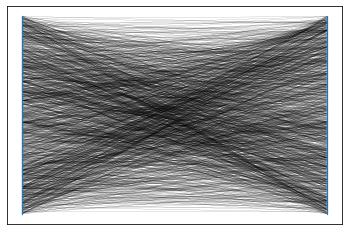

In [10]:
nx.draw_networkx(G, pos = nx.drawing.layout.bipartite_layout(G, a), width = 0.1, linewidths = 0.5, node_size = 0.5, scale = 0.5, with_labels = False)




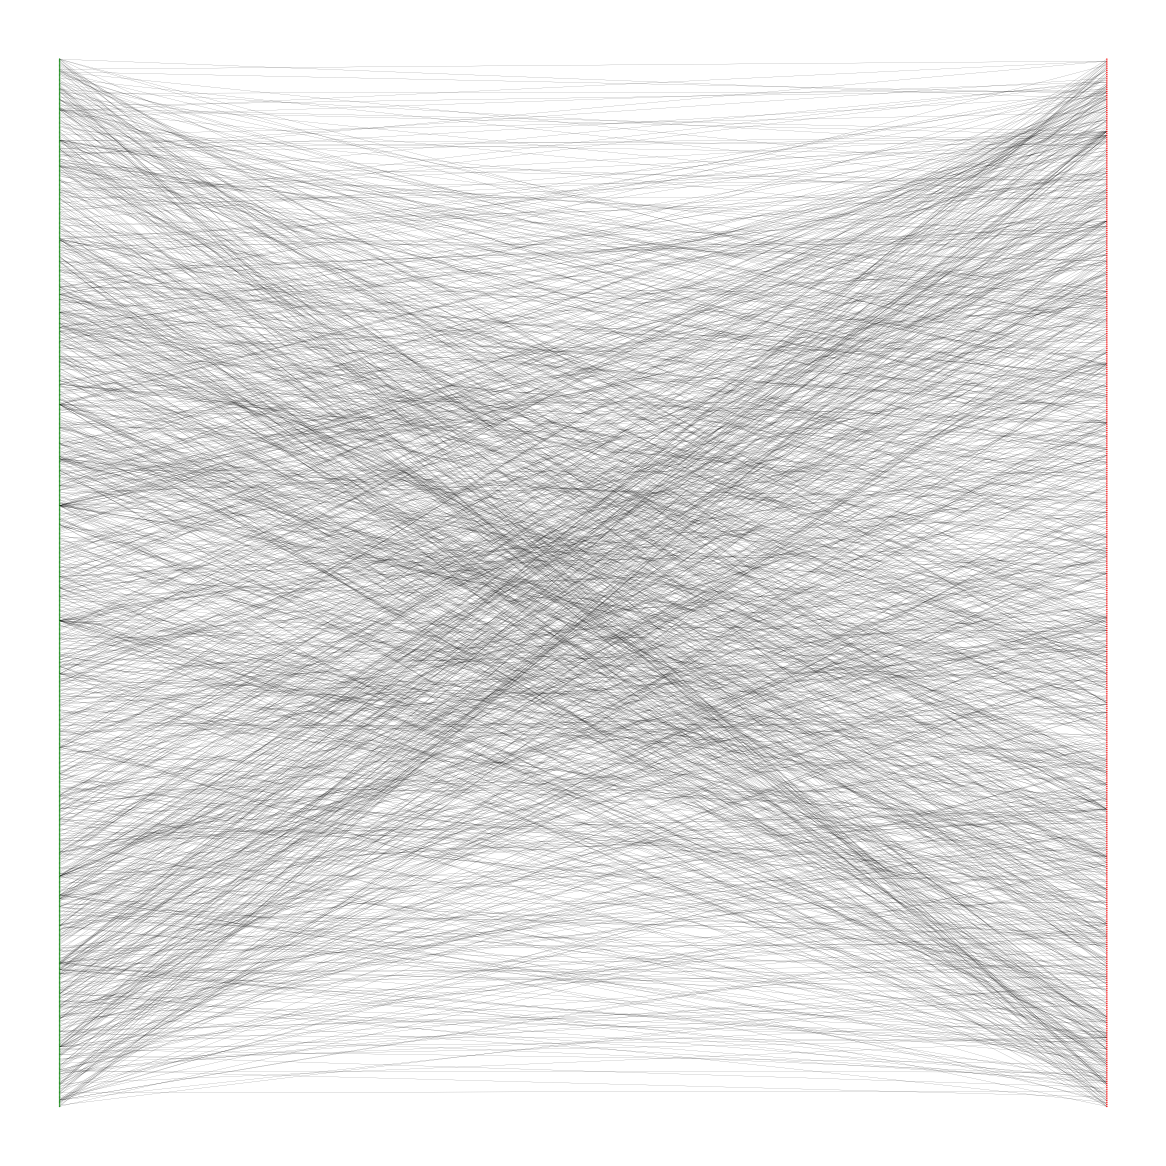

In [11]:
pos = nx.bipartite_layout(G, a)
plt.figure(3,figsize=(16,16))
color_map = []
edge_cm = []
for node in G:
    if node.startswith('p'):
        color_map.append('green')
    else:
        color_map.append('red')

#for edge in G:
#    if edge[role] == 'Suspect':
#        edge_cm.append('red')
        
nx.draw(G, pos, node_color=color_map, with_labels = False, node_size = 0.2, width = 0.1)
plt.show()

In [12]:
#How many different components in the network?
nx.number_connected_components(G)

20

In [13]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
Gcc[0]
len(G0)

1263

In [16]:
top_nodes0 = {n for n, d in G0.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes0 = set(G0) - top_nodes0

In [17]:
#G0.nodes['p1'].keys()
nx.get_node_attributes(G0, 'sex')

{'p1': '1',
 'p10': '1',
 'p100': '1',
 'p101': '1',
 'p102': '1',
 'p103': '1',
 'p105': '1',
 'p106': '1',
 'p107': '1',
 'p108': '0',
 'p109': '0',
 'p11': '0',
 'p110': '1',
 'p111': '1',
 'p112': '1',
 'p113': '1',
 'p114': '1',
 'p115': '0',
 'p116': '1',
 'p117': '0',
 'p118': '0',
 'p119': '0',
 'p12': '0',
 'p120': '1',
 'p121': '1',
 'p122': '0',
 'p123': '0',
 'p124': '1',
 'p125': '1',
 'p126': '1',
 'p128': '1',
 'p129': '1',
 'p13': '1',
 'p130': '1',
 'p131': '1',
 'p132': '1',
 'p133': '0',
 'p134': '0',
 'p136': '1',
 'p137': '1',
 'p138': '0',
 'p139': '1',
 'p14': '0',
 'p142': '0',
 'p143': '1',
 'p144': '1',
 'p147': '1',
 'p148': '1',
 'p149': '1',
 'p15': '0',
 'p150': '0',
 'p151': '0',
 'p152': '1',
 'p154': '1',
 'p155': '1',
 'p156': '1',
 'p159': '0',
 'p16': '1',
 'p160': '1',
 'p161': '1',
 'p162': '0',
 'p164': '1',
 'p165': '1',
 'p166': '1',
 'p167': '1',
 'p168': '1',
 'p169': '1',
 'p17': '0',
 'p170': '0',
 'p171': '0',
 'p173': '0',
 'p174': '0',
 '

In [18]:
plist = [s for s in top_nodes0]
female = []
male = []

for person in plist:
    if nx.get_node_attributes(G0, 'sex')[person] == '0':
        female.append(person)
    else:
        male.append(person)

        
ratio = round(len(female)/(len(female)+len(male))*100,2)
#len(female), len(male)
print(f'There are {len(female)} women and {len(male)} men in the dataset')
print(f'Women account for {ratio} % of the people nodes')      


There are 244 women and 510 men in the dataset
Women account for 32.36 % of the people nodes


In [19]:
victims = [e[0] for e in nx.get_edge_attributes(G0, 'weight') if nx.get_edge_attributes(G0, 'weight')[e] == ['Victim']]
suspects = [e[0] for e in nx.get_edge_attributes(G0, 'weight') if nx.get_edge_attributes(G0, 'weight')[e] == ['Suspect']]
witnesses = [e[0] for e in nx.get_edge_attributes(G0, 'weight') if nx.get_edge_attributes(G0, 'weight')[e] == ['Witness']]
vicsus = [e[0] for e in nx.get_edge_attributes(G0, 'weight') if nx.get_edge_attributes(G0, 'weight')[e] == ['Victim Suspect']]

In [20]:
femalev = []
malev = []

for person in victims:
    if nx.get_node_attributes(G0, 'sex')[person] == '0':
        femalev.append(person)
    else:
        malev.append(person)

ratiov = round(len(femalev)/(len(femalev)+len(malev))*100,2)
#If a single person has been a victim several times, they add to the count for each time they've been a victim
print(f'There are {len(femalev)} occurances of women being victims and {len(malev)} occurances of men being victims in the dataset')
print(f'Women account for {ratiov} % of the people nodes')

There are 142 occurances of women being victims and 376 occurances of men being victims in the dataset
Women account for 27.41 % of the people nodes


In [21]:
femaleS = []
maleS = []

for person in suspects:
    if nx.get_node_attributes(G0, 'sex')[person] == '0':
        femaleS.append(person)
    else:
        maleS.append(person)

ratioS = round(len(femaleS)/(len(femaleS)+len(maleS))*100,2)
#If a single person has been a suspect several times, they add to the count for each time they've been a suspect
print(f'There are {len(femaleS)} occurances of women being suspects and {len(maleS)} occurances of men being suspects in the dataset')
print(f'Women account for {ratioS} % of the people nodes')

There are 204 occurances of women being suspects and 437 occurances of men being suspects in the dataset
Women account for 31.83 % of the people nodes


In [22]:
femalew = []
malew = []

for person in witnesses:
    if nx.get_node_attributes(G0, 'sex')[person] == '0':
        femalew.append(person)
    else:
        malew.append(person)

ratiow = round(len(femalew)/(len(femalew)+len(malew))*100,2)
#If a single person has been a witness several times, they add to the count for each time they've been a suspect
print(f'There are {len(femalew)} occurances of women being witnesses and {len(malew)} occurances of men being witnesses in the dataset')
print(f'Women account for {ratiow} % of the people nodes')

There are 50 occurances of women being witnesses and 129 occurances of men being witnesses in the dataset
Women account for 27.93 % of the people nodes


In [23]:
femalevs = []
malevs = []

for person in vicsus:
    if nx.get_node_attributes(G0, 'sex')[person] == '0':
        femalevs.append(person)
    else:
        malevs.append(person)

ratiovs = round(len(femalevs)/(len(femalevs)+len(malevs))*100,2)
#If a single person has been a suspect several times, they add to the count for each time they've been a suspect
print(f'There are {len(femalevs)} occurances of women being suspects AND victims and {len(malevs)} occurances of men being suspects AND victims in the dataset')
print(f'Women account for {ratiovs} % of the people nodes')

There are 8 occurances of women being suspects AND victims and 31 occurances of men being suspects AND victims in the dataset
Women account for 20.51 % of the people nodes


[]

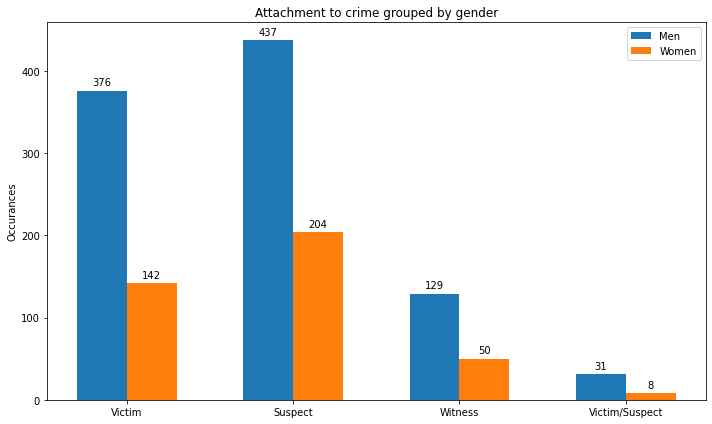

In [91]:
labels = ['Victim', 'Suspect', 'Witness', 'Victim/Suspect']
malerole = [len(malev), len(maleS), len(malew), len(malevs)]
femalerole = [len(femalev), len(femaleS), len(femalew), len(femalevs)]
plt.rcParams["figure.figsize"] = [10,6]
x = np.arange(4)
width = 0.3

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, malerole, width, label='Men')
bar2 = ax.bar(x + width/2, femalerole, width, label='Women')

#some text for the bar yes yes

ax.set_ylabel('Occurances')
ax.set_title('Attachment to crime grouped by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(bar1, padding=3)
ax.bar_label(bar2, padding=3)

fig.tight_layout()
plt.plot()

# Shows relationship between men and women relating to crime.

[]

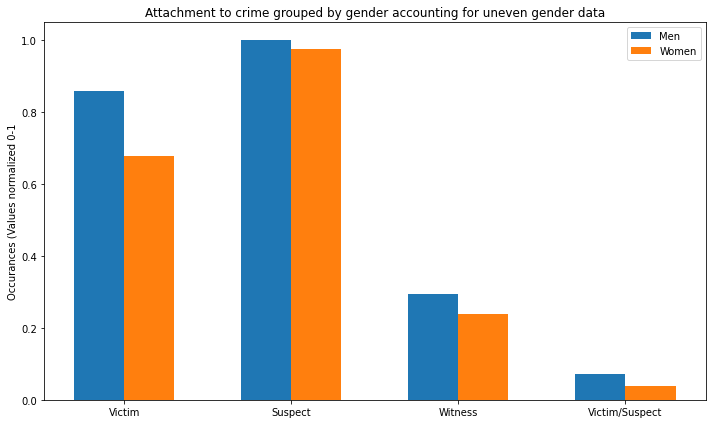

In [160]:
malefemaleratio =  (len(male) / len(female))

malefloat = [float(i) for i in malerole]
indexmax = max(malefloat)
femalefloat = [float(i) for i in femalerole]
numfe = np.array(femalerole)
numfe2 = numfe * malefemaleratio
numfe3 = numfe2 / indexmax
numfe3
numma = np.array(malerole)
numma2 = numma / indexmax
numfe3
numma2

labels = ['Victim', 'Suspect', 'Witness', 'Victim/Suspect']
#malerole = [len(malev), len(maleS), len(malew), len(malevs)]
#femalerole = [len(femalev), len(femaleS), len(femalew), len(femalevs)]
plt.rcParams["figure.figsize"] = [10,6]
x = np.arange(4)
width = 0.3

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, numma2, width, label='Men')
bar2 = ax.bar(x + width/2, numfe3, width, label='Women')

#some text for the bar yes yes

ax.set_ylabel('Occurances (Values normalized 0-1')
ax.set_title('Attachment to crime grouped by gender accounting for uneven gender data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(bar1, padding=3)
#ax.bar_label(bar2, padding=3)

fig.tight_layout()
plt.plot()

In [158]:
print(f'a man was associated with a crime {sum(malerole)} times. On average, a man is connected to {round(sum(malerole)/len(male),2)} crimes')
print(f'a woman was associated with a crime {sum(femalerole)} times. On average, a woman is connected to {round(sum(femalerole)/len(female),2)} crimes')

a man was associated with a crime 973 times. On average, a man is connected to 1.91 crimes
a woman was associated with a crime 404 times. On average, a woman is connected to 1.66 crimes


In [ ]:
comp_list = []
for comp in Gcc:
    comp_len = len(comp)
    comp_list.append(comp_len)

f'Number of nodes for each components {comp_list} and number of components {len(comp_list)}'

In [ ]:
pos = nx.bipartite_layout(G0, top_nodes0)
plt.figure(3,figsize=(16,16))
color_map = []
edge_cm = []
for node in G0:
    if node.startswith('p'):
        color_map.append('green')
    else:
        color_map.append('red')


        
nx.draw(G0, pos, node_color=color_map, with_labels = False, node_size = 0.2, width = 0.1)
plt.show()
len(top_nodes0)

In [ ]:
G.nodes()